# Titanic

In [1]:
import pandas
import numpy
import matplotlib
import matplotlib.style
matplotlib.style.use('ggplot')

%matplotlib inline

In [2]:
titanic_dataset = pandas.read_csv('Titanic.csv', index_col=0)

In [3]:
titanic_dataset.head(4)

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1


### O kolika pasažérech Titanicu víme?

In [4]:
passengers_count = len(titanic_dataset)

print('Titanic passengers count: ' + str(passengers_count))

Titanic passengers count: 1313


### Kolik procent jich přežilo?

In [5]:
survived_passengers = titanic_dataset.loc[titanic_dataset['Survived'] == 1]
survived_percent = len(survived_passengers)/passengers_count * 100

print('Survived passengers: ' + str(survived_percent) + '%')

Survived passengers: 34.27265803503427%


### Kolik procent žen přežilo? Kolik procent mužů?

In [6]:
survived_women = survived_passengers.loc[survived_passengers['SexCode'] == 1]
survived_men = survived_passengers.loc[survived_passengers['SexCode'] == 0]
women_passengers = titanic_dataset.loc[titanic_dataset['SexCode'] == 1]
men_passengers = titanic_dataset.loc[titanic_dataset['SexCode'] == 0]

survived_women_percent = len(survived_women)/len(women_passengers) * 100
survived_men_percent = len(survived_men)/len(men_passengers) * 100

print('Survived women: ' + str(survived_women_percent) + '%')
print('Survived men: ' + str(survived_men_percent) + '%')

Survived women: 66.66666666666666%
Survived men: 16.686251468860164%


### Pro každou třídu vypište kolik pasažérů dané třídy nastoupilo na loď, kolik jich přežilo, a kolik to dělá procent přeživších.

In [7]:
passenger_count_by_class = titanic_dataset.groupby('PClass')['Name'].count()

survived_count_by_class = survived_passengers.groupby('PClass')['Name'].count()

survived_percentage_by_total = survived_count_by_class.apply(lambda x: x/len(survived_passengers)) * 100

survived_percentage_by_class = survived_count_by_class/passenger_count_by_class * 100

class_data = pandas.DataFrame({'Passengers': passenger_count_by_class,
                               'Survivors': survived_count_by_class,
                               '% of total survivors': survived_percentage_by_total,
                               '% of class survivors': survived_percentage_by_class})
class_data = class_data[['Passengers', 'Survivors', '% of total survivors', '% of class survivors']].iloc[1:]
class_data.index.name = 'Class'
class_data

,Passengers,Survivors,% of total survivors,% of class survivors
Class,,,,
1st,322,193.0,42.888889,59.937888
2nd,279,119.0,26.444444,42.652330
3rd,711,138.0,30.666667,19.409283


### Vykreslete graf procenta přeživších podle dekády věku (t.j. procento pro 0-9 let, 10-19 let, atd.).

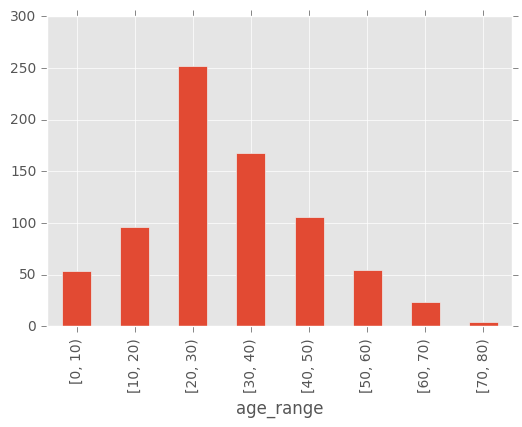

In [43]:
passengers_by_age = titanic_dataset.copy()

# get maximum age
max_age = passengers_by_age.ix[passengers_by_age['Age'].idxmax()]['Age']

# assign each passenger age category
passengers_by_age['age_range'] = pandas.cut(passengers_by_age['Age'], range(0,int(max_age+10),10), right=False)

# group passengers by their age categories
passengers_by_age = passengers_by_age.groupby('age_range')['Name'].count()

# draw a chart
passengers_by_age
passengers_by_age.plot.bar(legend=False)

### Závisí na sobě třída a věk pasažéra? Jak? Vykreslete graf(y), které tuto závislost znázorňují.)